# Deer diffusion

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
# Reminder on how numpy works
a = np.array([1,2,3])
b = np.array([10,20,30])
a*b + a # We'll do something similar with coordinates!

array([11, 42, 93])

<IPython.core.display.Javascript object>


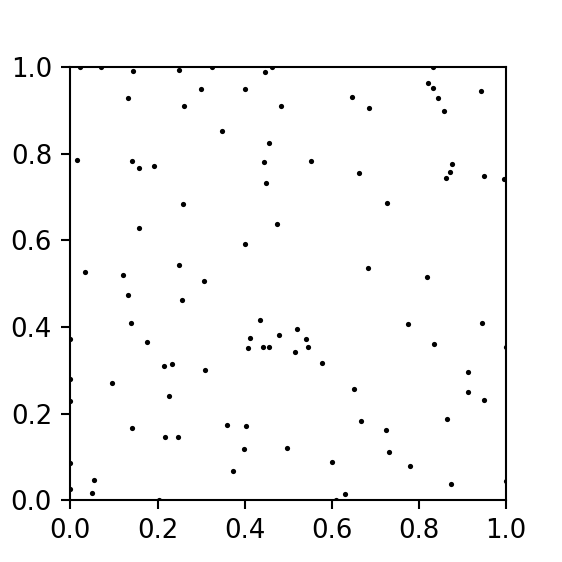

In [29]:
%matplotlib notebook
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}

n_animals = 100
n_steps = 100
diffusion_speed = 0.05   # Something speed-like

x = np.ones(n_animals)*0.5
y = np.ones(n_animals)*0.5

# Plotting
fig = plt.figure(figsize=(3,3))
ax = plt.subplot(111)
plt.xlim((0,1));
plt.ylim((0,1));
fig.show()
fig.canvas.draw()

for t in range(n_steps):
    x += np.random.randn(n_animals)*diffusion_speed
    y += np.random.randn(n_animals)*diffusion_speed
    for i in range(n_animals):
        if x[i] < 0:  x[i] = 0
        if x[i] > 1:  x[i] = 1
        if y[i] < 0:  y[i] = 0
        if y[i] > 1:  y[i] = 1
    
    ax.clear()
    plt.plot(x,y,'k.',markersize=2);
    plt.xlim((0,1));
    plt.ylim((0,1));
    fig.canvas.draw() # <--------------- The main command to make it move
    #time.sleep(0.01)

## Better ways to limit values in a numpy vector

The power of numpy is that if we can write a one-liner, it will be really fast. So we should try to avoid for loops, if possible.

For a playground situation let's create a numpy array with only one negative element, and then let's find a way to set this element to 0. So like limiting from below in our geese-meese situation.

In [46]:
# Playground for changing stuff in a vector
a = np.array([1,2,3,-7,4]) # Our task, limit this -7, making it a 0

# Option #1, loop, slow
a = np.array([1,2,3,-7,4]) 
for i in range(len(a)):
    if a[i]<0: a[i] = 0
print(a)

# Option #2, boolean indexing (fast)
a = np.array([1,2,3,-7,4]) 
print('a<0:',a<0)
print('a[a<0]:',a[a<0]) # Logical indexing
a[a<0] = 0              # Only set values for those elements where the condition is True 
print(a)

# Option #2.5: boolean conditioning with np.where
a = np.array([1,2,3,-7,4]) 
a = np.where(a>0, a, 0)
print(a)

# Option #3, vectorized formula (fast)
a = np.array([1,2,3,-7,4])
# np.max() calculates the max of all elements, 
# np.maximum() applies max to each element
a = np.maximum(a,0)
print(a)

[1 2 3 0 4]
a<0: [False False False  True False]
a[a<0]: [-7]
[1 2 3 0 4]
[1 2 3 0 4]
[1 2 3 0 4]
